# Tugas kecil 2: Eksplorasi Scikit-Learn pada Jupyter Notebook
---
Oleh: Ivan Jonathan (13516059) dan Mochamad Alghifari (13516038)

## Overview
    1. Import Library yang dibutuhkan
    2. Pembacaan Dataset Training
        2.1 Dataset Iris
        2.2 Dataset Play Tennis
    3. Pembelajaran Dataset Iris dengan Skema Full Training 
        3.1 Naïve Bayes
        3.2 DTL
        3.3 kNN
        3.4 Neural Network MLP
    4. Pembelajaran Dataset Iris dengan Skema Split Training 90%, test 10%, dan menampilkan kinerja serta confusion matrix
        4.1 Membagi dataset menjadi 10% untuk Test
        4.2 Naïve Bayes
        4.3 DTL
        4.4 kNN
        4.5 Neural Network MLP
    5. Pembelajaran Dataset Iris dengan Skema 10-Fold Cross Validation, dan menampilkan kinerjanya.
        5.1 Naïve Bayes
        5.2 DTL
        5.3 kNN
        5.4 Neural Network MLP
    6. Penyimpanan Model ke File External
    7. Sumber

## 1. Import Library yang dibutuhkan

In [1]:
#Import library untuk proses data
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

#Import library yang dibutuhkan untuk pembelajaran
import pandas as pd
from sklearn import datasets, metrics, neighbors, tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
import graphviz 
from sklearn.neural_network import MLPClassifier
from sklearn.externals import joblib

In [2]:
gnb = GaussianNB()
dtl = tree.DecisionTreeClassifier()
kNN = neighbors.KNeighborsClassifier(5, weights='uniform')
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)

## 2. Pembacaan Dataset Training

### 2.1 Dataset Iris

In [3]:
dfiris = datasets.load_iris()

#### Iris attributes

In [4]:
dfiris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### Iris data

In [5]:
dfiris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### Iris target

In [6]:
dfiris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 2.2 Dataset Play Tennis

#### Data play tennis

Karena training data berbentuk string maka harus dirubah menjadi bentuk integer dengan masing-masing fitur:

outlook: {'sunny':0,'rainy':1,'overcast':2}<br>
temperature: {'hot':0,'mild':1,'cool':2}<br>
humidity: {'normal':0,'high':1}<br>
windy: {'FALSE':0, 'TRUE':1}<br>
play: {'no':0,'yes':1}

In [7]:
#Lokasi dapat diganti sesuai dengan lokasi file csv di direktori anda
#/home/alghifari/Documents/Tucil2-AI/weather.nominal.csv
dfpt = pd.read_csv('/home/alghifari/Documents/Tucil2-AI/weather.nominal.csv',
                  sep=',',
                  header=None,
                  names=['outlook','temperature', 'humidity', 'windy','play'])
dfpt = dfpt[1:]

#Convert str to int for prediction
dfpt['outlook'] = dfpt.outlook.map({'sunny':0,'rainy':1,'overcast':2})
dfpt['temperature'] = dfpt.temperature.map({'hot':0,'mild':1,'cool':2})
dfpt['humidity'] = dfpt.humidity.map({'normal':0,'high':1})
dfpt['windy'] = dfpt.windy.map({'FALSE':0, 'TRUE':1})
dfpt['play'] = dfpt.play.map({'no':0,'yes':1})

dfpt

,outlook,temperature,humidity,windy,play
1,0,0,1,0,0
2,0,0,1,1,0
3,2,0,1,0,1
4,1,1,1,0,1
5,1,2,0,0,1
6,1,2,0,1,0
7,2,2,0,1,1
8,0,1,1,0,0
9,0,2,0,0,1
10,1,1,0,0,1


In [8]:
dfpt_data = dfpt.iloc[:,0:4].values
dfpt_data

array([[0, 0, 1, 0],
       [0, 0, 1, 1],
       [2, 0, 1, 0],
       [1, 1, 1, 0],
       [1, 2, 0, 0],
       [1, 2, 0, 1],
       [2, 2, 0, 1],
       [0, 1, 1, 0],
       [0, 2, 0, 0],
       [1, 1, 0, 0],
       [0, 1, 0, 1],
       [2, 1, 1, 1],
       [2, 0, 0, 0],
       [1, 1, 1, 1]])

#### Play tennis target

In [9]:
dfpt_target = dfpt.iloc[:, [4]].values.ravel()
dfpt_target

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

## 3. Pembelajaran Dataset Iris dengan Skema Full Training

### 3.1 Naïve Bayes

In [10]:
iris = gnb.fit(dfiris.data, dfiris.target)
print("Model: ")
print("Probabilitas tiap kelas: ")
print(iris.class_prior_)
print
print("Rata-rata fitur per kelas: ")
print(iris.theta_)
print
print("Probabilitas tiap fitur bila diberikan kelas: ")
print(iris.sigma_)

Model: 
Probabilitas tiap kelas: 
[0.33333333 0.33333333 0.33333333]
Rata-rata fitur per kelas: 
[[5.006 3.428 1.462 0.246]
 [5.936 2.77  4.26  1.326]
 [6.588 2.974 5.552 2.026]]
Probabilitas tiap fitur bila diberikan kelas: 
[[0.121764 0.140816 0.029556 0.010884]
 [0.261104 0.0965   0.2164   0.038324]
 [0.396256 0.101924 0.298496 0.073924]]


### 3.2 Decision Tree Learning

In [11]:
dtl_model = dtl.fit(dfiris.data, dfiris.target)

dot_data = tree.export_graphviz(dtl_model, out_file=None, 
                         feature_names=dfiris.feature_names,  
                         class_names=dfiris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = graphviz.Source(dot_data)


In [12]:
# Export to iris_dtl.pdf
graph.render("iris_dtl")

'iris_dtl.pdf'

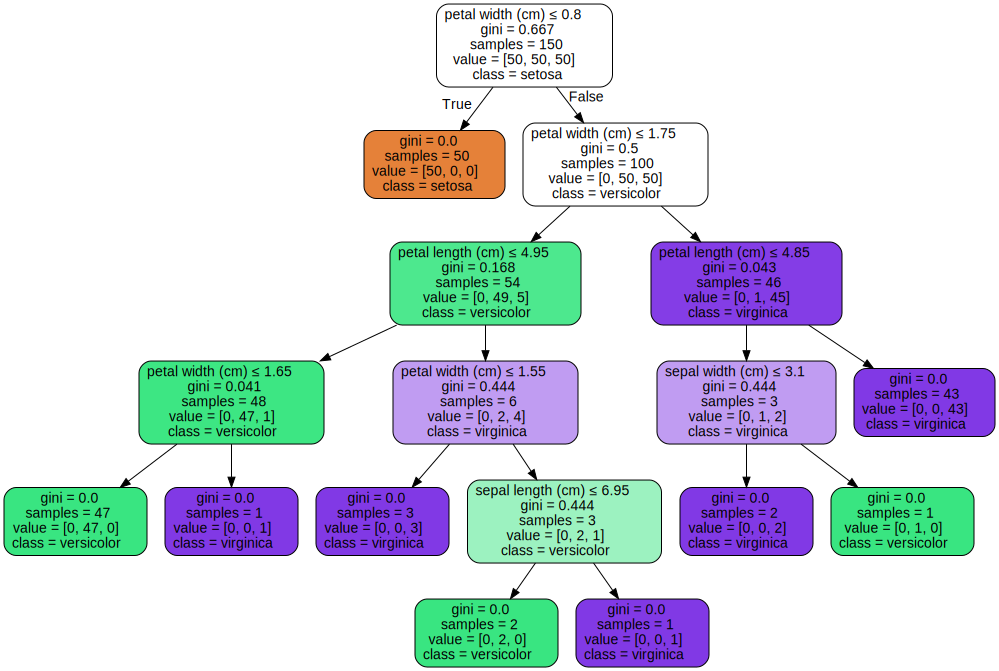

In [13]:
# Visualize decision tree learning model
graph 

### 3.3 *kNN*

Pada *k-Nearest Neighbor* (*kNN*) tidak menghasilkan model.

In [14]:
kNN.fit(dfiris.data, dfiris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### 3.4 Neural Network MLP

In [15]:
mlp_model = mlp.fit(dfiris.data, dfiris.target)
mlp_model

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

## 4. Pembelajaran Dataset Iris dengan Skema Split Training 90%, Test 10%, dan Menampilkan kinerja serta confusion matrix


### 4.1 Membagi dataset menjadi 10% untuk Test

In [16]:
X_train, X_test, y_train, y_test= train_test_split(dfiris.data, dfiris.target, test_size=0.1)

### 4.2 Naïve Bayes

In [17]:
bayes_model = gnb.fit(X_train, y_train)
prediction_bayes = bayes_model.predict(X_test)
precision_bayes = metrics.precision_score(y_test, prediction_bayes, average=None) * 100
recall_bayes = metrics.recall_score(y_test, prediction_bayes, average=None) * 100

print("Kinerja: ")
print("\t1. Akurasi: %f" % (np.mean(prediction_bayes == y_test) * 100) + "%")
print("\t2. Presisi tiap kelas:")
for i in range(3):
    print("\t\t" + dfiris.target_names[i] + ": " + str(precision_bayes[i]) + "%")
print
print("\t3. Recall setiap kelas:")
for i in range(3):
    print("\t\t" + dfiris.target_names[i] + ": " + str(recall_bayes[i]) + "%")
print

print
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, prediction_bayes))  

Kinerja: 
	1. Akurasi: 100.000000%
	2. Presisi tiap kelas:
		setosa: 100.0%
		versicolor: 100.0%
		virginica: 100.0%
	3. Recall setiap kelas:
		setosa: 100.0%
		versicolor: 100.0%
		virginica: 100.0%
Confusion Matrix: 
[[5 0 0]
 [0 6 0]
 [0 0 4]]


### 4.3 Decision Tree Learning

In [18]:
dtl_model = dtl.fit(X_train, y_train)
prediction_dtl = dtl_model.predict(X_test)
precision_dtl = metrics.precision_score(y_test, prediction_dtl, average=None) * 100
recall_dtl = metrics.recall_score(y_test, prediction_dtl, average=None) * 100

print("Kinerja: ")
print("\t1. Akurasi: %f" % (np.mean(prediction_dtl == y_test) * 100) + "%")
print("\t2. Presisi tiap kelas:")
for i in range(3):
    print("\t\t" + dfiris.target_names[i] + ": " + str(precision_dtl[i]) + "%")
print("\t3. Recall setiap kelas:")
for i in range(3):
    print("\t\t" + dfiris.target_names[i] + ": " + str(recall_dtl[i]) + "%")
print

print
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, prediction_dtl))  

Kinerja: 
	1. Akurasi: 100.000000%
	2. Presisi tiap kelas:
		setosa: 100.0%
		versicolor: 100.0%
		virginica: 100.0%
	3. Recall setiap kelas:
		setosa: 100.0%
		versicolor: 100.0%
		virginica: 100.0%
Confusion Matrix: 
[[5 0 0]
 [0 6 0]
 [0 0 4]]


### 4.4 *kNN*

In [19]:
kNN.fit(X_train, y_train)
prediction_knn = kNN.predict(X_test)
precision_knn = metrics.precision_score(y_test, prediction_knn, average=None) * 100
recall_knn = metrics.recall_score(y_test, prediction_knn, average=None) * 100

print("Kinerja: ")
print("\t1. Akurasi: %f" % (np.mean(prediction_knn == y_test) * 100) + "%")
print("\t2. Presisi tiap kelas:")
for i in range(3):
    print("\t\t" + dfiris.target_names[i] + ": " + str(precision_knn[i]) + "%")
print("\t3. Recall setiap kelas:")
for i in range(3):
    print("\t\t" + dfiris.target_names[i] + ": " + str(recall_knn[i]) + "%")
print

print
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, prediction_knn))  

Kinerja: 
	1. Akurasi: 100.000000%
	2. Presisi tiap kelas:
		setosa: 100.0%
		versicolor: 100.0%
		virginica: 100.0%
	3. Recall setiap kelas:
		setosa: 100.0%
		versicolor: 100.0%
		virginica: 100.0%
Confusion Matrix: 
[[5 0 0]
 [0 6 0]
 [0 0 4]]


### 4.5 Neural Network MLP

In [20]:
mlp_model = mlp.fit(X_train, y_train)
prediction_mlp = mlp_model.predict(X_test)
precision_mlp = metrics.precision_score(y_test, prediction_mlp, average=None) * 100
recall_mlp = metrics.recall_score(y_test, prediction_mlp, average=None) * 100

print("Kinerja: ")
print("\t1. Akurasi: %f" % (np.mean(prediction_mlp == y_test) * 100) + "%")
print("\t2. Presisi tiap kelas:")
for i in range(3):
    print("\t\t" + dfiris.target_names[i] + ": " + str(precision_mlp[i]) + "%")
print("\t3. Recall setiap kelas:")
for i in range(3):
    print("\t\t" + dfiris.target_names[i] + ": " + str(recall_mlp[i]) + "%")
print

print
print("Confusion Matrix: ")
print(metrics.confusion_matrix(y_test, prediction_mlp))  

Kinerja: 
	1. Akurasi: 26.666667%
	2. Presisi tiap kelas:
		setosa: 0.0%
		versicolor: 0.0%
		virginica: 26.666666666666668%
	3. Recall setiap kelas:
		setosa: 0.0%
		versicolor: 0.0%
		virginica: 100.0%
Confusion Matrix: 
[[0 0 5]
 [0 0 6]
 [0 0 4]]


/usr/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 5. Pembelajaran Dataset Iris dengan Skema 10-Fold Cross Validation, dan menampilkan kinerjanya.

### 5.1 Naïve Bayes

In [21]:
scores_bayes = cross_val_score(gnb, dfiris.data, dfiris.target, cv=10)

i = 1
print("Kinerja: ")
for score in scores_bayes:
    print("Fold ke-%d" % i + " = %f" % score)
    i+=1
print
print("Rata-rata = %f"% np.mean(scores_bayes))

Kinerja: 
Fold ke-1 = 0.933333
Fold ke-2 = 0.933333
Fold ke-3 = 1.000000
Fold ke-4 = 0.933333
Fold ke-5 = 0.933333
Fold ke-6 = 0.933333
Fold ke-7 = 0.866667
Fold ke-8 = 1.000000
Fold ke-9 = 1.000000
Fold ke-10 = 1.000000
Rata-rata = 0.953333


### 5.2 Decision Tree Learning

In [22]:
scores_dtl = cross_val_score(dtl, dfiris.data, dfiris.target, cv=10)

i = 1
print("Kinerja: ")
for score in scores_dtl:
    print("Fold ke-%d" % i + " = %f" % score)
    i+=1
print
print("Rata-rata = %f"% np.mean(scores_dtl))

Kinerja: 
Fold ke-1 = 1.000000
Fold ke-2 = 0.933333
Fold ke-3 = 1.000000
Fold ke-4 = 0.933333
Fold ke-5 = 0.933333
Fold ke-6 = 0.866667
Fold ke-7 = 0.933333
Fold ke-8 = 1.000000
Fold ke-9 = 1.000000
Fold ke-10 = 1.000000
Rata-rata = 0.960000


### 5.3 *kNN*

In [23]:
scores_knn = cross_val_score(kNN, dfiris.data, dfiris.target, cv=10)

i = 1
print("Kinerja: ")
for score in scores_knn:
    print("Fold ke-%d" % i + " = %f" % score)
    i+=1
print
print("Rata-rata = %f"% np.mean(scores_knn))

Kinerja: 
Fold ke-1 = 1.000000
Fold ke-2 = 0.933333
Fold ke-3 = 1.000000
Fold ke-4 = 1.000000
Fold ke-5 = 0.866667
Fold ke-6 = 0.933333
Fold ke-7 = 0.933333
Fold ke-8 = 1.000000
Fold ke-9 = 1.000000
Fold ke-10 = 1.000000
Rata-rata = 0.966667


### 5.4 Neural Network MLP

In [24]:
scores_mlp = cross_val_score(mlp, dfiris.data, dfiris.target, cv=10)

i = 1
print("Kinerja: ")
for score in scores_mlp:
    print("Fold ke-%d" % i + " = %f" % score)
    i+=1
print
print("Rata-rata = %f"% np.mean(scores_mlp))

Kinerja: 
Fold ke-1 = 0.333333
Fold ke-2 = 0.333333
Fold ke-3 = 0.333333
Fold ke-4 = 0.333333
Fold ke-5 = 0.333333
Fold ke-6 = 0.333333
Fold ke-7 = 0.333333
Fold ke-8 = 0.333333
Fold ke-9 = 0.333333
Fold ke-10 = 0.333333
Rata-rata = 0.333333


## 6. Penyimpanan Model ke File External

In [25]:
joblib.dump(gnb, 'iris_NB.mdl')
joblib.dump(dtl, 'iris_DT.mdl')
joblib.dump(kNN, 'iris_kNN.mdl')
joblib.dump(mlp, 'iris_MLP.mdl')

['iris_MLP.mdl']

## 7. Sumber

Tom Mitchell, Machine Learning, 1999, Textbook